In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("hotel_booking_data.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
#Data Cleaning-Remove Personally Identifiable Information (PII):
df = df.drop(columns=['name', 'email', 'phone-number', 'credit_card'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#Handle Missing Values:
missing_values = df.isnull().sum()
print(missing_values)
# Example strategy: fill missing values in 'children' and 'agent' with 0
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
#Data Type Conversion:
df['is_canceled'] = df['is_canceled'].astype('bool')
df['arrival_date_year'] = df['arrival_date_year'].astype('int')
df['adults'] = df['adults'].astype('int')
df['children'] = df['children'].astype('int')
df['babies'] = df['babies'].astype('int')
df['is_repeated_guest'] = df['is_repeated_guest'].astype('bool')

In [8]:
#Date Parsing:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                    df['arrival_date_month'] + '-' + 
                                    df['arrival_date_day_of_month'].astype(str),
                                    format='%Y-%B-%d')

In [9]:
#Exploratory Data Analysis (EDA)
#Cancellation Analysis:
cancellation_rate = df['is_canceled'].mean()
print(f"Cancellation Rate: {cancellation_rate}")

Cancellation Rate: 0.37041628277075134


<Axes: title={'center': 'Distribution of Lead Times'}, ylabel='Frequency'>

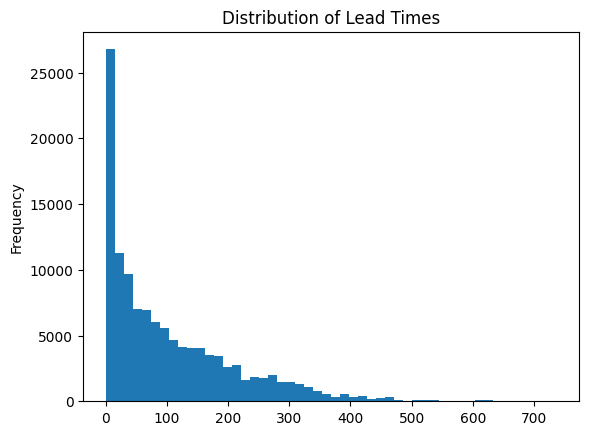

In [10]:
#Lead Time Analysis:
df['lead_time'].plot(kind='hist', bins=50, title='Distribution of Lead Times')

<Axes: title={'center': 'Number of Bookings by Month'}, xlabel='arrival_date_month'>

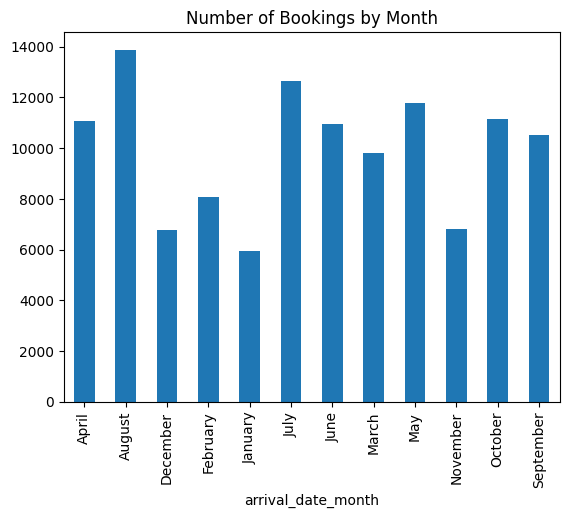

In [11]:
#Seasonality: How does the number of bookings vary by month?
bookings_by_month = df['arrival_date_month'].value_counts().sort_index()
bookings_by_month.plot(kind='bar', title='Number of Bookings by Month')

In [12]:
#Guest Demographics:What is the average number of adults, children, and babies per booking?
avg_adults = df['adults'].mean()
avg_children = df['children'].mean()
avg_babies = df['babies'].mean()
print(f"Average Adults: {avg_adults}, Average Children: {avg_children}, Average Babies: {avg_babies}")


Average Adults: 1.8564033838679956, Average Children: 0.10388642264846303, Average Babies: 0.007948739425412514


<Axes: title={'center': 'Market Segments'}, xlabel='market_segment'>

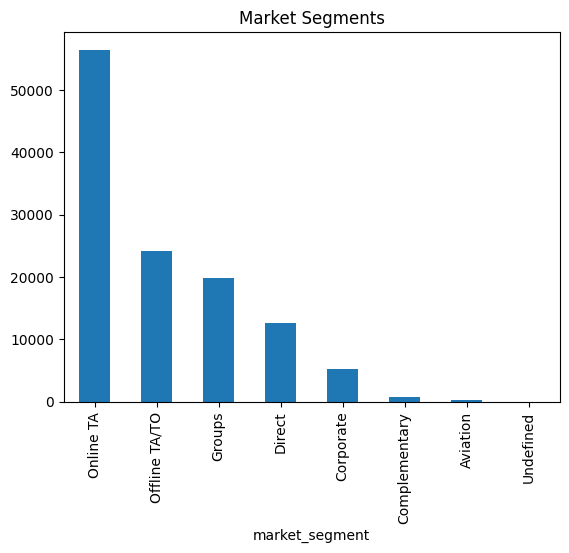

In [13]:
#Market Segmentation:What are the most common market segments?
market_segments = df['market_segment'].value_counts()
market_segments.plot(kind='bar', title='Market Segments')

<Axes: title={'center': 'Average Daily Rate by Customer Type'}, xlabel='customer_type'>

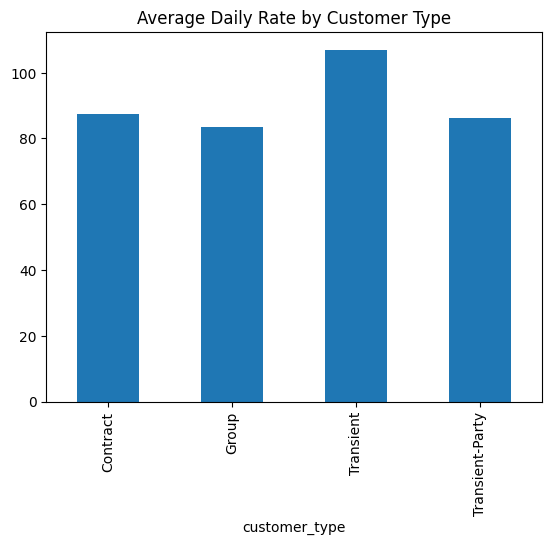

In [14]:
#Revenue Analysis:What is the average daily rate (ADR) for different customer types?
adr_by_customer_type = df.groupby('customer_type')['adr'].mean()
adr_by_customer_type.plot(kind='bar', title='Average Daily Rate by Customer Type')

<Axes: title={'center': 'Cancellation Rate by Number of Special Requests'}, xlabel='total_of_special_requests'>

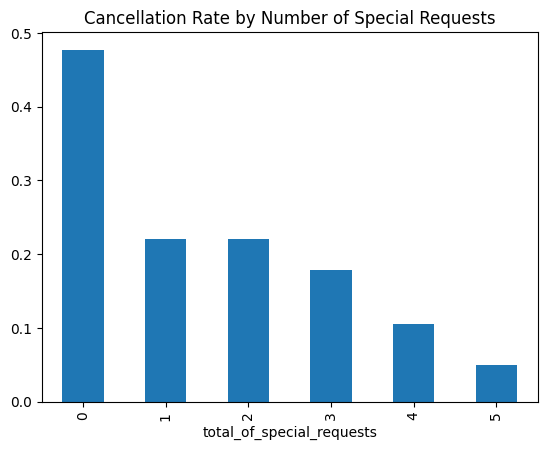

In [15]:
#Special Requests:How do special requests correlate with booking cancellations?
special_requests_cancellation = df.groupby('total_of_special_requests')['is_canceled'].mean()
special_requests_cancellation.plot(kind='bar', title='Cancellation Rate by Number of Special Requests')

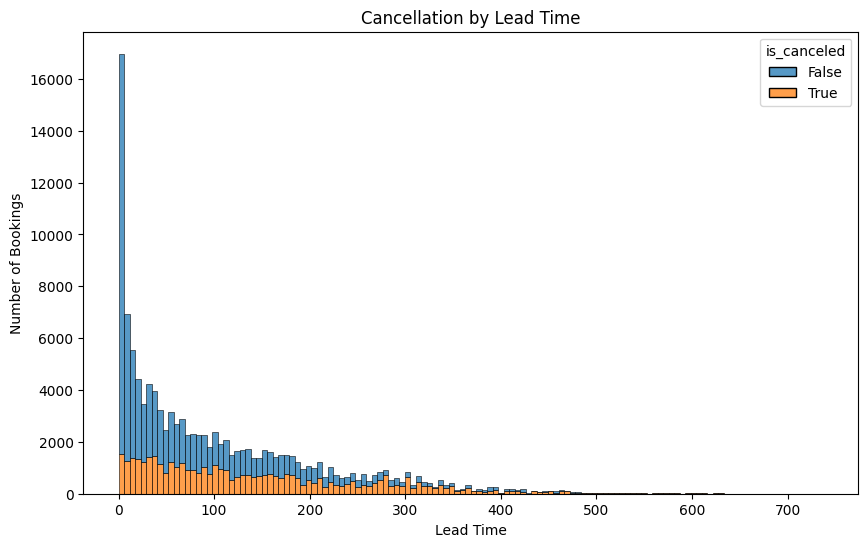

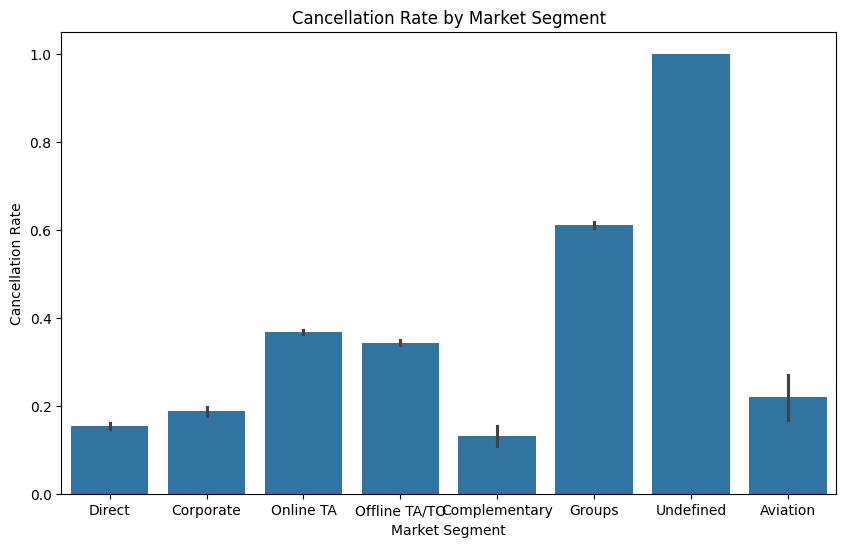

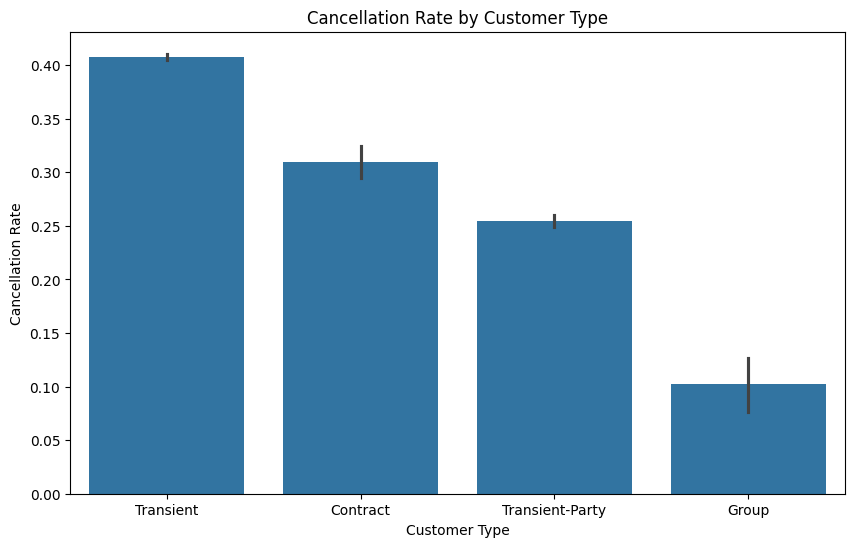

In [17]:
#Cancellation Patterns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe
# Analyze cancellation patterns
cancellation_factors = df[['is_canceled', 'lead_time', 'market_segment', 'customer_type']].copy()

# Plot cancellation rates by lead time
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='stack')
plt.title('Cancellation by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Number of Bookings')
plt.show()

# Plot cancellation rates by market segment
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='market_segment', y='is_canceled')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.show()

# Plot cancellation rates by customer type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='customer_type', y='is_canceled')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()

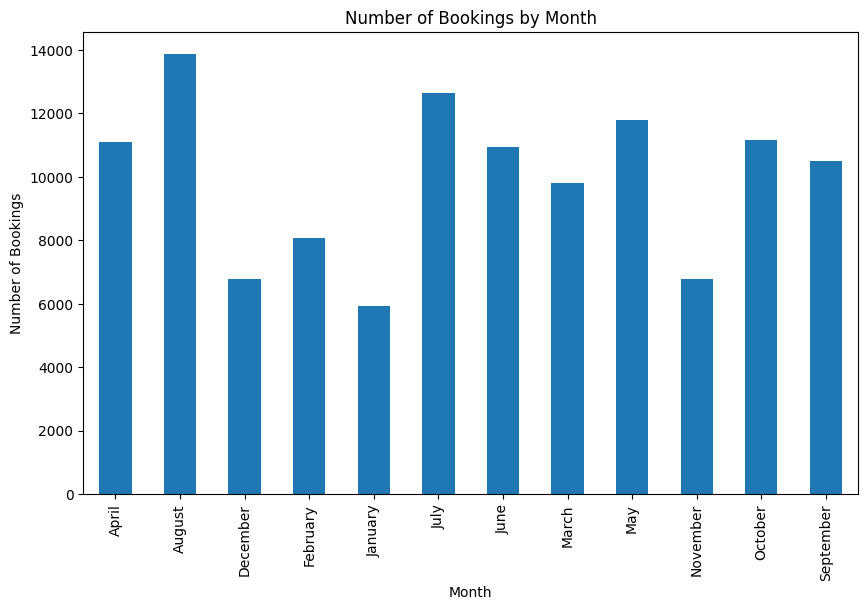

In [18]:
#Seasonality and Demand
# Analyze seasonality and demand
bookings_by_month = df['arrival_date_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
bookings_by_month.plot(kind='bar')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

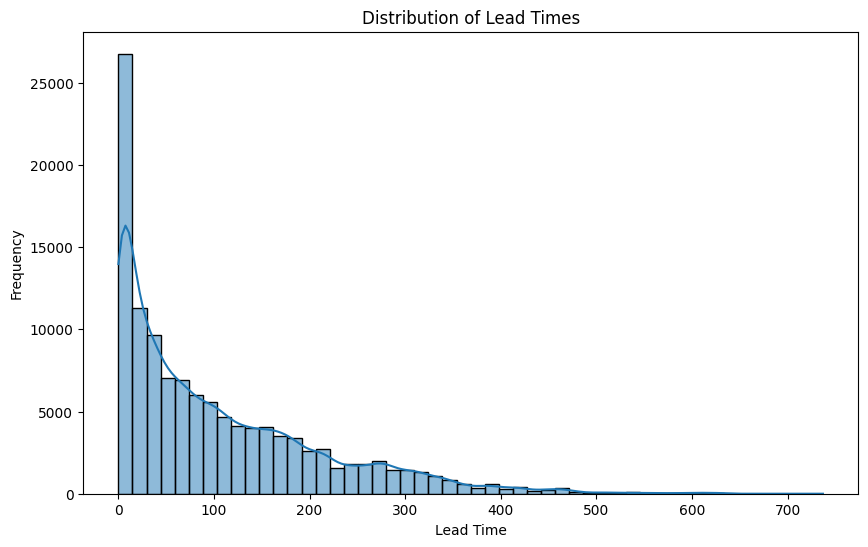

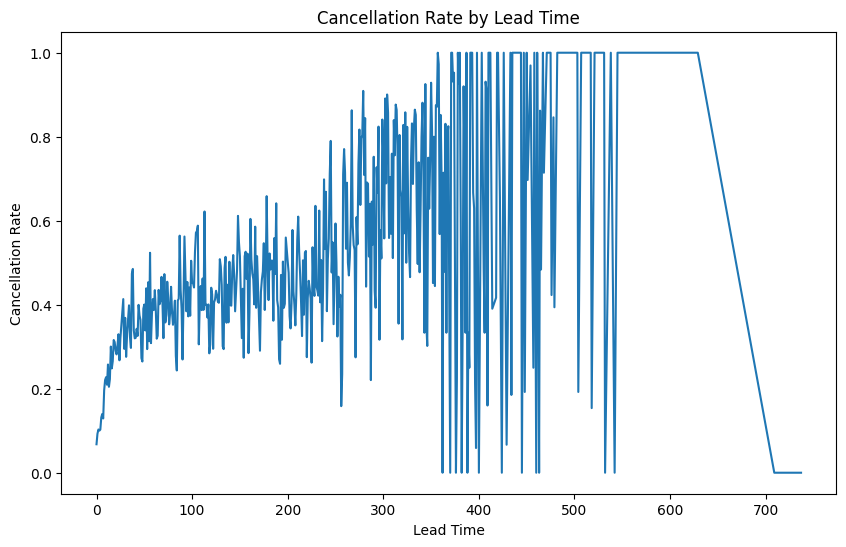

In [19]:
#Lead Time Analysis
# Lead time distribution and its impact on cancellations
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

lead_time_cancellation = df.groupby('lead_time')['is_canceled'].mean()

plt.figure(figsize=(10, 6))
lead_time_cancellation.plot(kind='line')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

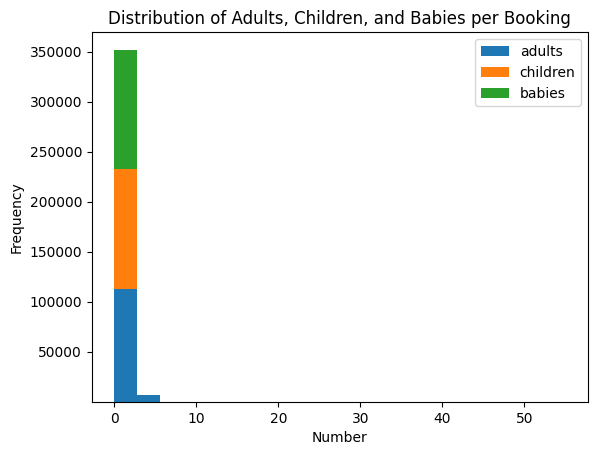

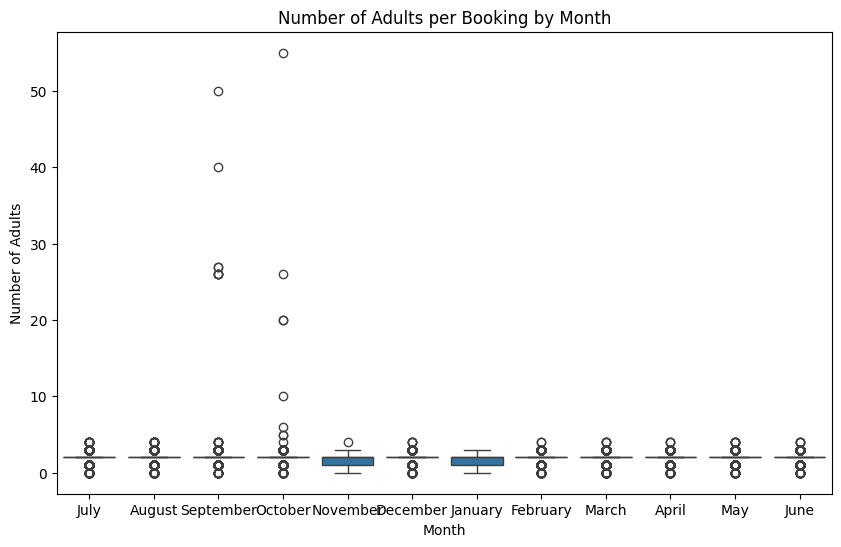

In [20]:
#Guest Composition
# Distribution of adults, children, and babies
plt.figure(figsize=(10, 6))
df[['adults', 'children', 'babies']].plot(kind='hist', stacked=True, bins=20)
plt.title('Distribution of Adults, Children, and Babies per Booking')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

# Variation by season or hotel type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='arrival_date_month', y='adults')
plt.title('Number of Adults per Booking by Month')
plt.xlabel('Month')
plt.ylabel('Number of Adults')
plt.show()

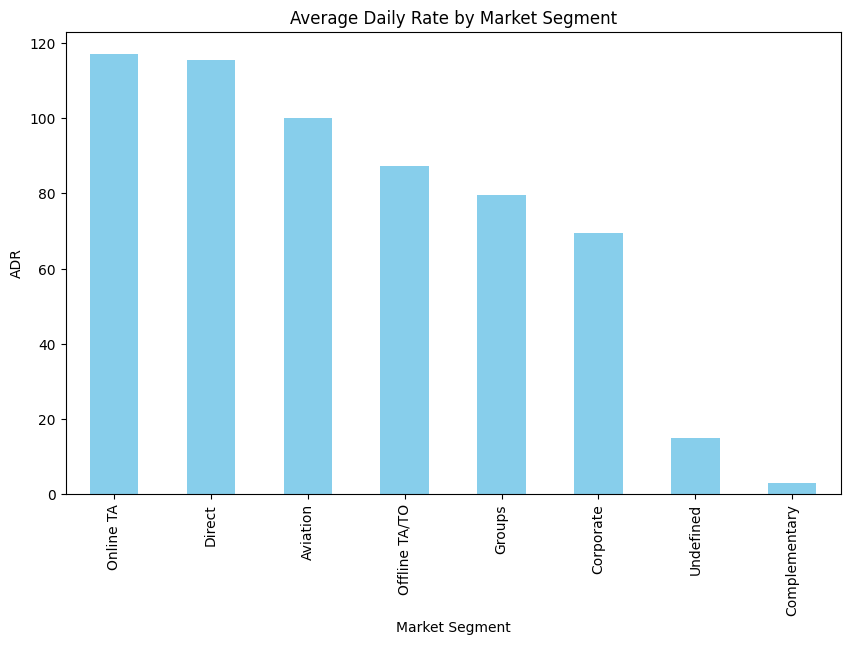

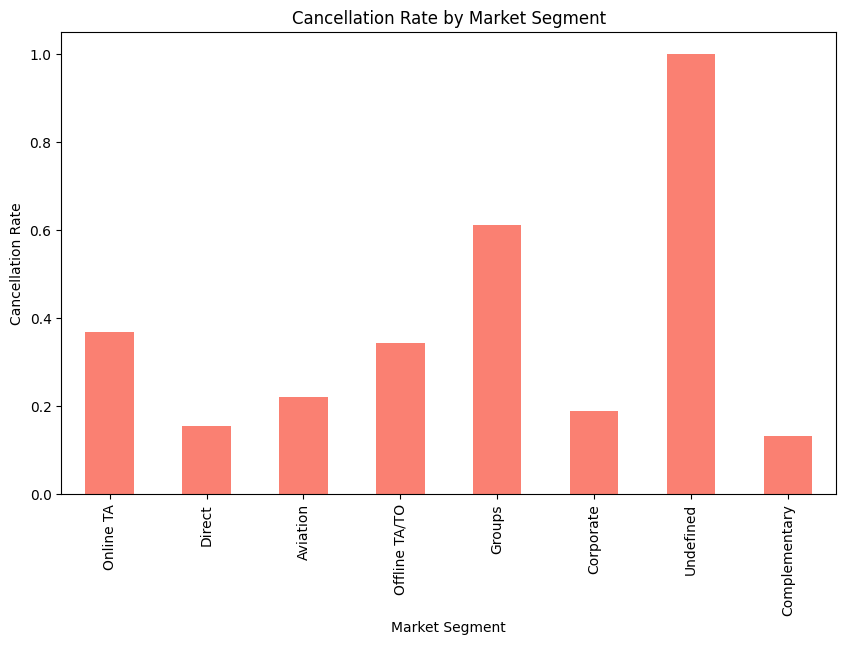

In [21]:
#Market Segment Performance
# Market segments analysis
market_segment_performance = df.groupby('market_segment').agg({
    'adr': 'mean',
    'is_canceled': 'mean'
}).sort_values(by='adr', ascending=False)

plt.figure(figsize=(10, 6))
market_segment_performance['adr'].plot(kind='bar', color='skyblue')
plt.title('Average Daily Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('ADR')
plt.show()

plt.figure(figsize=(10, 6))
market_segment_performance['is_canceled'].plot(kind='bar', color='salmon')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.show()

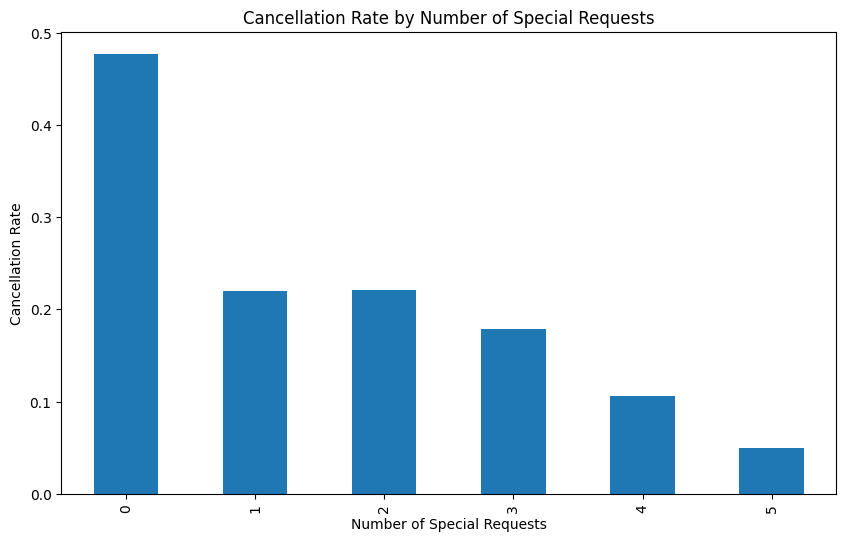

In [22]:
#Special Requests and Customer Satisfaction
# Special requests correlation with cancellations and booking changes
special_requests_cancellation = df.groupby('total_of_special_requests')['is_canceled'].mean()

plt.figure(figsize=(10, 6))
special_requests_cancellation.plot(kind='bar')
plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate')
plt.show()

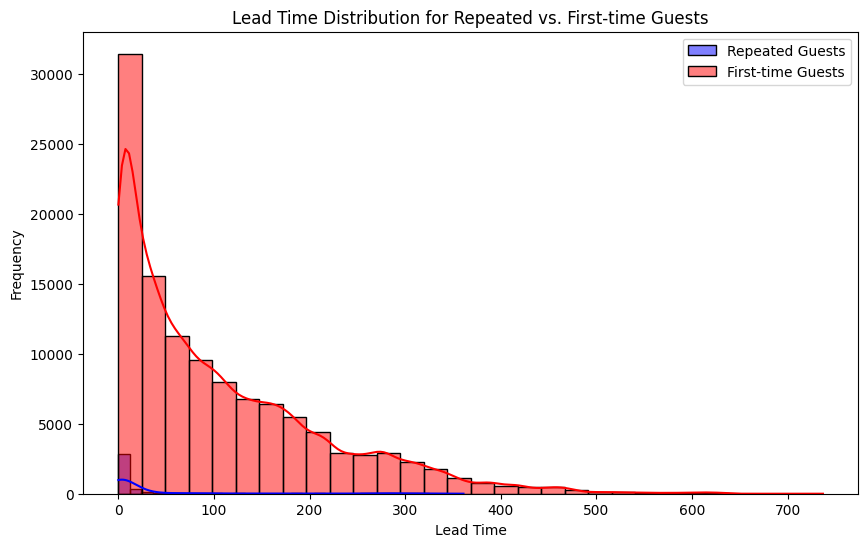

In [23]:
#Repeated Guests
# Characteristics of repeated guests
repeated_guests = df[df['is_repeated_guest'] == 1]
first_time_guests = df[df['is_repeated_guest'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(repeated_guests['lead_time'], bins=30, color='blue', label='Repeated Guests', kde=True)
sns.histplot(first_time_guests['lead_time'], bins=30, color='red', label='First-time Guests', kde=True)
plt.title('Lead Time Distribution for Repeated vs. First-time Guests')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

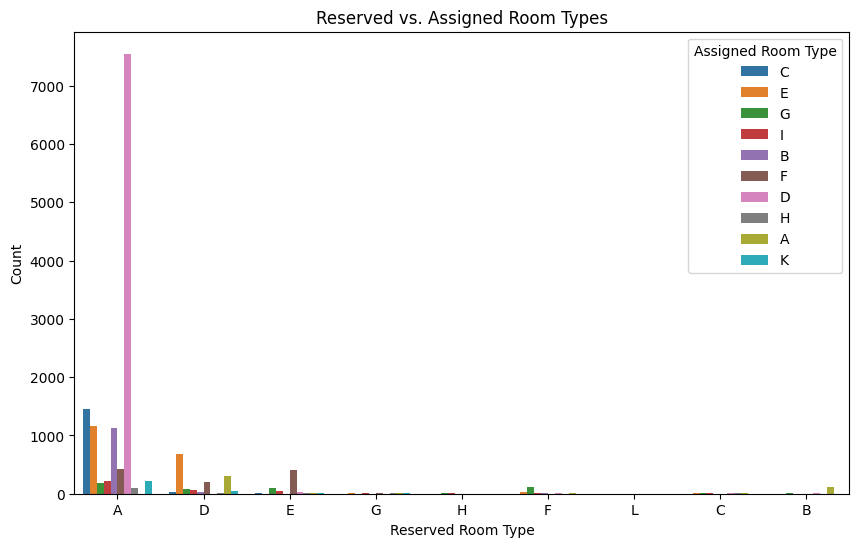

In [24]:
#Room Type Analysis
# Analysis of reserved vs. assigned room types
room_type_change = df[df['reserved_room_type'] != df['assigned_room_type']]
room_type_change_rate = len(room_type_change) / len(df)

plt.figure(figsize=(10, 6))
sns.countplot(data=room_type_change, x='reserved_room_type', hue='assigned_room_type')
plt.title('Reserved vs. Assigned Room Types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.legend(title='Assigned Room Type')
plt.show()

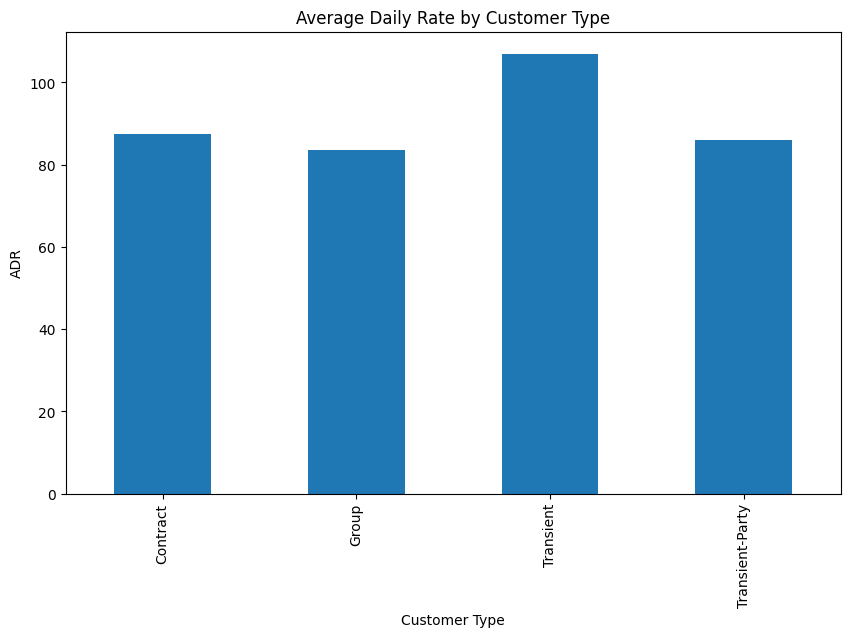

In [25]:
#Revenue Analysis
# ADR by customer type
adr_by_customer_type = df.groupby('customer_type')['adr'].mean()

plt.figure(figsize=(10, 6))
adr_by_customer_type.plot(kind='bar')
plt.title('Average Daily Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('ADR')
plt.show()

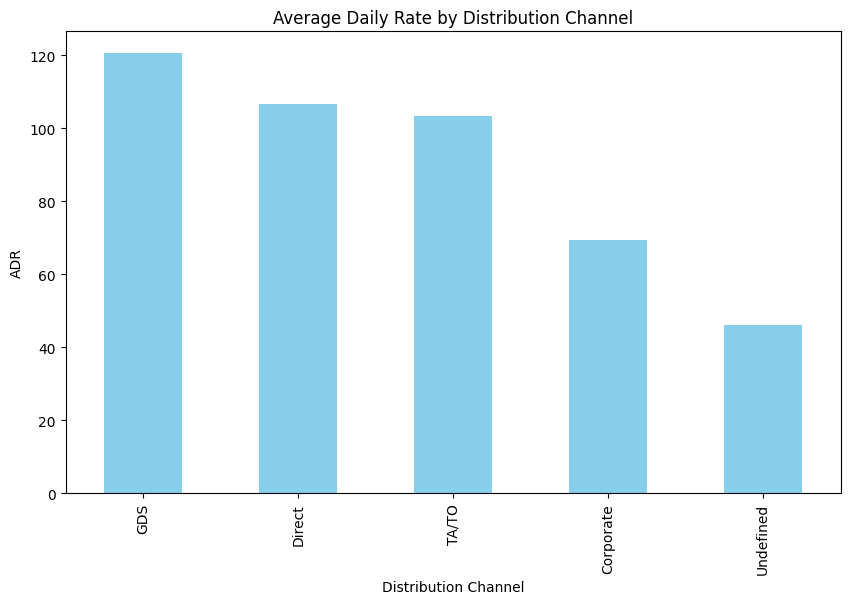

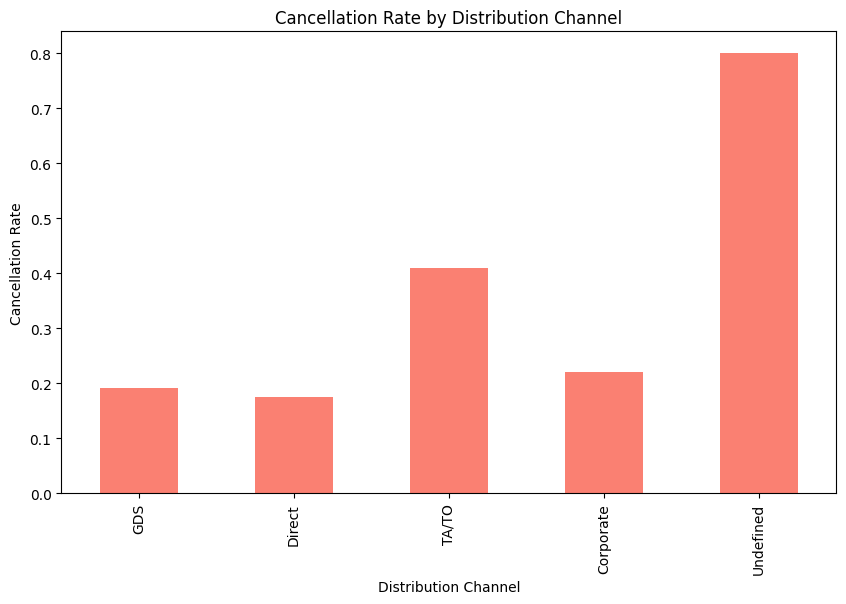

In [26]:
#Booking Channel Effectiveness
# Distribution channels analysis
distribution_channel_performance = df.groupby('distribution_channel').agg({
    'adr': 'mean',
    'is_canceled': 'mean'
}).sort_values(by='adr', ascending=False)

plt.figure(figsize=(10, 6))
distribution_channel_performance['adr'].plot(kind='bar', color='skyblue')
plt.title('Average Daily Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('ADR')
plt.show()

plt.figure(figsize=(10, 6))
distribution_channel_performance['is_canceled'].plot(kind='bar', color='salmon')
plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.show()